In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import linearcorex
from metric_utils import calculate_nll_score

In [2]:
from generate_data import generate_nglf_from_model

In [218]:
m = 8
bs = 16
nv = m * bs
train_cnt = 8
test_cnt = 100
(data, ground_truth) = generate_nglf_from_model(nv=nv, m=m, nt=1, ns=train_cnt + test_cnt, snr=5.0)
data = data[0]
train_data = data[:train_cnt]
test_data = data[train_cnt:]

Fixed SNR: 5.0


In [219]:
calculate_nll_score(data=[test_data], covs=[ground_truth])

195.31336702807687

# test linear corex

In [220]:
corex = linearcorex.Corex(n_hidden=m,
                          max_iter=500)

In [221]:
corex.fit(train_data)

### learned covariance

In [222]:
corex_cov = corex.get_covariance()

In [223]:
calculate_nll_score(data=[test_data], covs=[corex_cov])

254.22118663765144

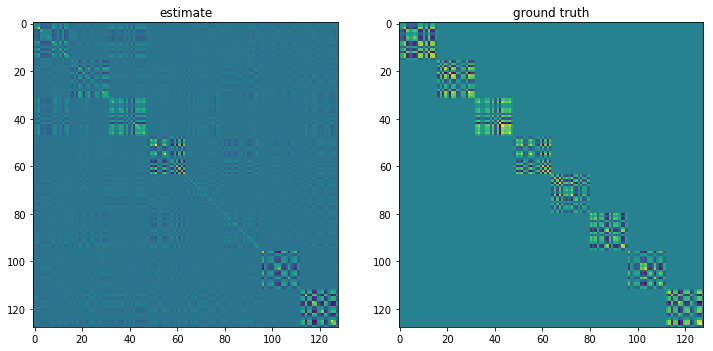

In [224]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(corex_cov)
ax[0].set_title('estimate')
ax[1].imshow(ground_truth)
ax[1].set_title('ground truth');

### W matrice

In [225]:
W = corex.ws
print W.shape

(8, 128)


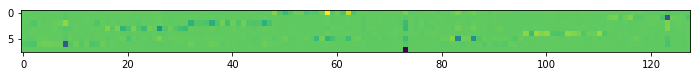

In [226]:
plt.figure(figsize=(12, 6))
plt.imshow(W);

### distibution of Z

In [227]:
Z = np.dot(data, W.T)
print Z.shape

(108, 8)


In [228]:
print np.var(Z, axis=0)

[ 8.27963907  3.37199706  5.33816802  6.29072373  4.24054345  4.27778014
  8.31840824  3.39678897]


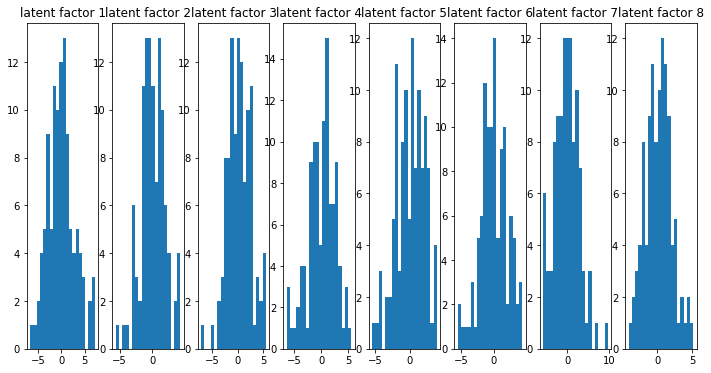

In [229]:
fig, ax = plt.subplots(nrows=1, ncols=m, figsize=(12, 6))
for i in range(m):
    ax[i].hist(Z[:, i], bins=20)
    ax[i].set_title('latent factor {}'.format(i+1))

# test theano implementation of linear corex

In [230]:
from theano_linear_corex_L1 import Corex

In [243]:
best_nll = np.inf
best_th_corex = None
best_l1 = None
coefs = [0, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1.0, 3.0]
nlls = []
for l1 in coefs:
    print "training with l1 = {}".format(l1)
    cur_th_corex = Corex(nv=nv,
                    n_hidden=m,
                    max_iter=1000,
                    l1=l1,
                    verbose=1)
    cur_th_corex.fit(train_data)
    cur_th_corex_cov = cur_th_corex.get_covariance()
    nll = calculate_nll_score(data=[test_data], covs=[cur_th_corex_cov])
    nlls.append(nll)
    print "l1 = {}, nll = {}".format(l1, nll)
    if nll < best_nll:
        best_nll = nll
        best_th_corex = cur_th_corex
        best_l1 = l1

print "best l1 = {}".format(best_l1)
th_corex = best_th_corex

training with l1 = 0
Linear CorEx with 8 latent factors
tc = 13.0305914325, obj = -61.7365142215, eps = 0.6
tc = 16.6023498075, obj = -70.871550695, eps = 0.6
tc = 18.3405850636, obj = -55.9003463493, eps = 0.6
tc = 20.3195491272, obj = -57.5700582123, eps = 0.6
tc = 22.4776085915, obj = -66.7981098679, eps = 0.6
tc = 23.7859670863, obj = -58.8208321276, eps = 0.6
tc = 24.9502734628, obj = -70.106194928, eps = 0.6
tc = 25.8912677114, obj = -64.3244611623, eps = 0.6
tc = 26.6984940974, obj = -74.5671408433, eps = 0.6
tc = 27.4138132468, obj = -71.5742901879, eps = 0.6
tc = 29.1176960943, obj = -72.0211200924, eps = 0.6
tc = 30.2871526793, obj = -48.7951075264, eps = 0.6
tc = 31.1092946424, obj = -70.8914238713, eps = 0.6
tc = 31.9452982414, obj = -81.6969439905, eps = 0.6
tc = 32.7707910372, obj = -65.0692721076, eps = 0.6
tc = 33.3963957213, obj = -81.9871337147, eps = 0.6
tc = 34.173308557, obj = -74.5460658224, eps = 0.6
tc = 34.8717338785, obj = -72.60897388, eps = 0.6
tc = 35.43177

tc = 115.225742635, obj = -134.903652926, eps = 0.216
tc = 115.199346732, obj = -125.444269524, eps = 0.216
tc = 115.287474491, obj = -129.267568384, eps = 0.216
tc = 115.258649752, obj = -127.67128411, eps = 0.216
tc = 115.334537008, obj = -122.093523461, eps = 0.216
tc = 115.353963811, obj = -131.275064425, eps = 0.216
tc = 115.248903962, obj = -128.284393377, eps = 0.216
tc = 115.28533261, obj = -125.113486566, eps = 0.216
tc = 115.419591566, obj = -133.693118798, eps = 0.216
tc = 115.305863699, obj = -127.835700884, eps = 0.216
tc = 115.436519169, obj = -134.013940633, eps = 0.216
tc = 115.420736735, obj = -126.528782046, eps = 0.216
tc = 115.387606163, obj = -132.102999638, eps = 0.216
tc = 115.403573672, obj = -133.814138851, eps = 0.216
tc = 115.342035168, obj = -127.73360593, eps = 0.216
tc = 115.44977907, obj = -127.794784462, eps = 0.216
tc = 127.962513581, obj = -136.563136578, eps = 0.1296
tc = 128.120569443, obj = -133.12571587, eps = 0.1296
tc = 128.31700273, obj = -136.2

tc = 138.336309857, obj = -140.661270558, eps = 0.046656
tc = 138.183341114, obj = -140.738927495, eps = 0.046656
tc = 138.379521534, obj = -141.761359223, eps = 0.046656
tc = 138.419517284, obj = -143.132793194, eps = 0.046656
tc = 138.419868603, obj = -141.790166768, eps = 0.046656
tc = 138.361993928, obj = -141.180913585, eps = 0.046656
tc = 138.388723095, obj = -140.908658926, eps = 0.046656
tc = 138.401080092, obj = -139.796521182, eps = 0.046656
tc = 138.432387063, obj = -142.711382902, eps = 0.046656
tc = 138.43014286, obj = -142.060386559, eps = 0.046656
tc = 138.454088906, obj = -141.539741114, eps = 0.046656
tc = 138.39523755, obj = -141.881215021, eps = 0.046656
tc = 138.400558507, obj = -140.660900382, eps = 0.046656
tc = 138.331514669, obj = -140.766284896, eps = 0.046656
tc = 138.43777352, obj = -141.356640862, eps = 0.046656
tc = 138.502652021, obj = -143.362177064, eps = 0.046656
tc = 138.471380907, obj = -142.160773181, eps = 0.046656
tc = 138.476107948, obj = -142.351

tc = 43.0819724316, obj = -87.5574205452, eps = 0.6
tc = 43.3681205971, obj = -85.0007869378, eps = 0.6
tc = 43.3251171874, obj = -87.0184233248, eps = 0.6
tc = 43.6030609328, obj = -92.2596771229, eps = 0.6
tc = 43.7675038122, obj = -78.3585211666, eps = 0.6
tc = 43.8586703399, obj = -87.5599054837, eps = 0.6
tc = 43.9407135016, obj = -76.5173689269, eps = 0.6
tc = 44.0239405651, obj = -94.0482271543, eps = 0.6
tc = 44.0134537336, obj = -86.9255563511, eps = 0.6
tc = 44.0878714798, obj = -97.4834097267, eps = 0.6
tc = 44.2649381529, obj = -87.0264590871, eps = 0.6
tc = 44.3265607317, obj = -89.0532448043, eps = 0.6
tc = 44.4448765308, obj = -93.4991888184, eps = 0.6
tc = 44.5092819349, obj = -91.9767218473, eps = 0.6
tc = 44.6122973806, obj = -95.2714937835, eps = 0.6
tc = 44.7287749706, obj = -90.4932463925, eps = 0.6
tc = 78.4601371585, obj = -106.671341806, eps = 0.36
tc = 78.9056603979, obj = -107.277585859, eps = 0.36
tc = 79.2869955057, obj = -109.789967607, eps = 0.36
tc = 79.6

tc = 131.032144172, obj = -138.470947377, eps = 0.1296
tc = 131.131475064, obj = -137.052960992, eps = 0.1296
tc = 131.139131592, obj = -136.843617945, eps = 0.1296
tc = 131.103033922, obj = -140.115125194, eps = 0.1296
tc = 131.117601738, obj = -138.736689972, eps = 0.1296
tc = 131.168927392, obj = -136.633009124, eps = 0.1296
tc = 131.202269134, obj = -141.030986204, eps = 0.1296
tc = 131.141039543, obj = -141.836342335, eps = 0.1296
tc = 131.109976757, obj = -139.47013113, eps = 0.1296
tc = 131.117472381, obj = -139.32266514, eps = 0.1296
tc = 130.859570574, obj = -134.986728963, eps = 0.1296
tc = 131.14108214, obj = -135.98196944, eps = 0.1296
tc = 131.196828545, obj = -139.418122768, eps = 0.1296
tc = 131.114707137, obj = -136.180464308, eps = 0.1296
tc = 131.137719031, obj = -136.085108063, eps = 0.1296
tc = 131.145036111, obj = -142.626431272, eps = 0.1296
tc = 131.157940302, obj = -142.405351492, eps = 0.1296
tc = 131.179001207, obj = -140.527638822, eps = 0.1296
tc = 137.24325

tc = 142.001394593, obj = -145.228388798, eps = 0
tc = 141.95144036, obj = -143.095624701, eps = 0
tc = 142.00480166, obj = -143.504394119, eps = 0
tc = 142.026483056, obj = -143.826135911, eps = 0
tc = 142.035676732, obj = -144.369083168, eps = 0
tc = 142.028746671, obj = -144.395878241, eps = 0
tc = 142.002480462, obj = -144.68181071, eps = 0
tc = 141.998325681, obj = -144.838599223, eps = 0
tc = 142.046691082, obj = -143.603474522, eps = 0
tc = 141.975949671, obj = -144.9291454, eps = 0
tc = 142.033056552, obj = -144.710796004, eps = 0
tc = 141.958352056, obj = -143.661790738, eps = 0
tc = 141.979556363, obj = -143.856297937, eps = 0
tc = 142.004582179, obj = -143.774517736, eps = 0
tc = 142.022312276, obj = -143.723227686, eps = 0
tc = 142.009525115, obj = -142.493206529, eps = 0
tc = 142.038547251, obj = -143.989097518, eps = 0
tc = 142.007383644, obj = -146.092352185, eps = 0
tc = 141.988924558, obj = -143.436498443, eps = 0
tc = 141.990797217, obj = -143.172372103, eps = 0
tc = 

tc = 85.9444301228, obj = -118.115799404, eps = 0.36
tc = 86.0428110597, obj = -109.54000957, eps = 0.36
tc = 86.1627791171, obj = -105.899292888, eps = 0.36
tc = 86.1846478039, obj = -116.77112498, eps = 0.36
tc = 86.1389283072, obj = -115.017206863, eps = 0.36
tc = 86.2471767265, obj = -112.450174347, eps = 0.36
tc = 86.3145559359, obj = -118.350955752, eps = 0.36
tc = 86.3928584406, obj = -115.382175351, eps = 0.36
tc = 86.4208564358, obj = -117.828998472, eps = 0.36
tc = 86.5408567516, obj = -118.722589395, eps = 0.36
tc = 86.4872848911, obj = -112.615191918, eps = 0.36
tc = 86.3742242783, obj = -112.073694504, eps = 0.36
tc = 86.5237554305, obj = -115.975581552, eps = 0.36
tc = 86.6629002904, obj = -110.280240819, eps = 0.36
tc = 86.6634177933, obj = -112.799734958, eps = 0.36
tc = 86.6531300761, obj = -114.886696728, eps = 0.36
tc = 86.7302628326, obj = -114.564727602, eps = 0.36
tc = 108.629083508, obj = -121.238029005, eps = 0.216
tc = 109.202242244, obj = -125.45910521, eps = 

tc = 136.719112944, obj = -140.021084284, eps = 0.07776
tc = 136.725457426, obj = -140.366153122, eps = 0.07776
tc = 136.776037758, obj = -145.599590152, eps = 0.07776
tc = 136.732774665, obj = -142.660760695, eps = 0.07776
tc = 136.767114611, obj = -140.74244815, eps = 0.07776
tc = 136.797537859, obj = -138.260168075, eps = 0.07776
tc = 136.78886266, obj = -142.302800713, eps = 0.07776
tc = 136.807168938, obj = -139.733458027, eps = 0.07776
tc = 136.743966347, obj = -140.02195322, eps = 0.07776
tc = 136.777385228, obj = -136.927216487, eps = 0.07776
tc = 136.824274818, obj = -139.759156953, eps = 0.07776
tc = 136.767562004, obj = -140.860608234, eps = 0.07776
tc = 136.81096431, obj = -139.599485215, eps = 0.07776
tc = 136.774604382, obj = -140.261021069, eps = 0.07776
tc = 136.748760573, obj = -142.485783775, eps = 0.07776
tc = 136.81655745, obj = -139.906406555, eps = 0.07776
tc = 136.808050791, obj = -138.179820739, eps = 0.07776
tc = 136.753373687, obj = -141.108826918, eps = 0.077

tc = 14.8015625706, obj = -64.912365952, eps = 0.6
tc = 16.6043164268, obj = -70.4463415905, eps = 0.6
tc = 18.9467981989, obj = -52.0644891101, eps = 0.6
tc = 20.3176468506, obj = -60.350496974, eps = 0.6
tc = 21.4122380097, obj = -57.4868286827, eps = 0.6
tc = 22.7230133541, obj = -73.1555137949, eps = 0.6
tc = 23.6359130436, obj = -72.3529305802, eps = 0.6
tc = 24.3621867643, obj = -67.6197885583, eps = 0.6
tc = 25.8523050502, obj = -66.4291584956, eps = 0.6
tc = 26.9377788879, obj = -66.8942220895, eps = 0.6
tc = 28.1951247518, obj = -73.7518670613, eps = 0.6
tc = 29.2031083974, obj = -70.4733245474, eps = 0.6
tc = 29.8740224686, obj = -65.3765117718, eps = 0.6
tc = 30.6174993432, obj = -55.4780376572, eps = 0.6
tc = 31.6887882523, obj = -61.6332336903, eps = 0.6
tc = 32.6195388585, obj = -67.4805355136, eps = 0.6
tc = 33.4501272293, obj = -83.6759222729, eps = 0.6
tc = 34.4172130107, obj = -72.2408085787, eps = 0.6
tc = 35.1768211732, obj = -66.8541904275, eps = 0.6
tc = 35.567449

tc = 117.170579803, obj = -131.903677195, eps = 0.216
tc = 117.156361931, obj = -133.658135232, eps = 0.216
tc = 117.223024265, obj = -136.570550265, eps = 0.216
tc = 117.153094869, obj = -132.725204344, eps = 0.216
tc = 117.161270397, obj = -135.635988182, eps = 0.216
tc = 117.220935268, obj = -125.83640727, eps = 0.216
tc = 117.167389482, obj = -131.729125132, eps = 0.216
tc = 117.245729594, obj = -127.358919455, eps = 0.216
tc = 117.224531264, obj = -126.069647247, eps = 0.216
tc = 117.247048586, obj = -129.376650119, eps = 0.216
tc = 117.187139057, obj = -130.590337533, eps = 0.216
tc = 117.052567281, obj = -136.335937927, eps = 0.216
tc = 117.201710615, obj = -136.576903436, eps = 0.216
tc = 117.324794163, obj = -128.326236938, eps = 0.216
tc = 117.342487982, obj = -131.713785142, eps = 0.216
tc = 117.369057484, obj = -129.867128322, eps = 0.216
tc = 117.387082633, obj = -133.716071311, eps = 0.216
tc = 130.474298547, obj = -137.424655816, eps = 0.1296
tc = 130.719026237, obj = -1

tc = 140.009015079, obj = -140.684772129, eps = 0.046656
tc = 139.990694608, obj = -141.330513114, eps = 0.046656
tc = 140.02724165, obj = -140.967607741, eps = 0.046656
tc = 139.980817218, obj = -142.547208205, eps = 0.046656
tc = 140.038490316, obj = -143.510047291, eps = 0.046656
tc = 140.033350744, obj = -139.259688648, eps = 0.046656
tc = 139.971197766, obj = -142.080816787, eps = 0.046656
tc = 140.000826451, obj = -141.949644368, eps = 0.046656
tc = 140.030538263, obj = -141.646083656, eps = 0.046656
tc = 140.02996819, obj = -142.05234616, eps = 0.046656
tc = 140.008729634, obj = -145.263242157, eps = 0.046656
tc = 140.007302009, obj = -139.199807122, eps = 0.046656
tc = 139.962016069, obj = -142.099263767, eps = 0.046656
tc = 140.069263053, obj = -143.133035767, eps = 0.046656
tc = 140.044488144, obj = -143.30527796, eps = 0.046656
tc = 140.043738035, obj = -143.703170604, eps = 0.046656
tc = 139.965076364, obj = -140.312916686, eps = 0.046656
tc = 139.991610216, obj = -140.5882

tc = 43.4619847168, obj = -81.2745971447, eps = 0.6
tc = 43.6770221026, obj = -97.1386333211, eps = 0.6
tc = 43.8689872636, obj = -76.9883043029, eps = 0.6
tc = 43.9383571906, obj = -89.2481453856, eps = 0.6
tc = 44.0003794259, obj = -84.4919816122, eps = 0.6
tc = 44.1191940308, obj = -79.7449829289, eps = 0.6
tc = 44.1108650777, obj = -82.4686978921, eps = 0.6
tc = 44.2563725235, obj = -84.159057675, eps = 0.6
tc = 44.4032935771, obj = -82.7426440198, eps = 0.6
tc = 44.5059543066, obj = -88.1245288701, eps = 0.6
tc = 44.5630836056, obj = -87.8372848615, eps = 0.6
tc = 44.6278002418, obj = -85.3056867467, eps = 0.6
tc = 44.5894354297, obj = -90.8569337345, eps = 0.6
tc = 44.5881776078, obj = -101.754007131, eps = 0.6
tc = 44.8818821036, obj = -94.553857354, eps = 0.6
tc = 44.9747389746, obj = -82.3557114806, eps = 0.6
tc = 45.0935243708, obj = -84.0527715075, eps = 0.6
tc = 45.1016877661, obj = -86.6420067155, eps = 0.6
tc = 45.0936833217, obj = -92.8348209513, eps = 0.6
tc = 45.228023

tc = 130.592626413, obj = -136.61034402, eps = 0.1296
tc = 130.536181368, obj = -137.532533648, eps = 0.1296
tc = 130.615654628, obj = -137.202655326, eps = 0.1296
tc = 130.646386336, obj = -137.295905197, eps = 0.1296
tc = 130.648779223, obj = -134.255960267, eps = 0.1296
tc = 130.63203843, obj = -136.712912539, eps = 0.1296
tc = 130.579606624, obj = -135.159182015, eps = 0.1296
tc = 130.616184048, obj = -134.934629899, eps = 0.1296
tc = 130.635137003, obj = -132.58378922, eps = 0.1296
tc = 130.640320911, obj = -137.111150176, eps = 0.1296
tc = 130.590449174, obj = -139.256589579, eps = 0.1296
tc = 130.71190178, obj = -133.534277635, eps = 0.1296
tc = 130.708537175, obj = -136.562880481, eps = 0.1296
tc = 130.7258343, obj = -135.814111595, eps = 0.1296
tc = 130.685296603, obj = -139.497792452, eps = 0.1296
tc = 130.761712497, obj = -136.386479223, eps = 0.1296
tc = 130.729344167, obj = -134.991777952, eps = 0.1296
tc = 130.62581787, obj = -136.065797684, eps = 0.1296
tc = 130.75504658

tc = 141.02956208, obj = -139.609599919, eps = 0
tc = 140.939597715, obj = -142.687439314, eps = 0
tc = 140.957409939, obj = -140.482335228, eps = 0
tc = 141.015977434, obj = -141.404460086, eps = 0
tc = 140.910672719, obj = -140.210156452, eps = 0
tc = 141.003169211, obj = -142.218759162, eps = 0
tc = 140.991782201, obj = -143.472054302, eps = 0
tc = 141.018597528, obj = -139.510045248, eps = 0
tc = 141.003747059, obj = -143.596619795, eps = 0
tc = 141.076660206, obj = -140.442840367, eps = 0
tc = 141.074890511, obj = -141.175697234, eps = 0
tc = 140.999879015, obj = -142.041631431, eps = 0
tc = 141.055712361, obj = -140.806580916, eps = 0
tc = 141.066186721, obj = -141.709249443, eps = 0
tc = 141.097576424, obj = -141.321066624, eps = 0
tc = 141.090866557, obj = -139.803996802, eps = 0
tc = 140.909961311, obj = -142.270864175, eps = 0
tc = 141.080871107, obj = -141.387308328, eps = 0
tc = 141.060685443, obj = -143.845587316, eps = 0
tc = 141.103925728, obj = -142.810707254, eps = 0
t

tc = 85.3650965359, obj = -101.904805118, eps = 0.36
tc = 85.4586129665, obj = -105.418158091, eps = 0.36
tc = 85.4760893721, obj = -109.404118074, eps = 0.36
tc = 85.3337870736, obj = -107.345264217, eps = 0.36
tc = 85.1078067223, obj = -103.209191747, eps = 0.36
tc = 85.6308625777, obj = -106.774291378, eps = 0.36
tc = 85.7071667635, obj = -104.192402502, eps = 0.36
tc = 85.7801454318, obj = -106.597120909, eps = 0.36
tc = 85.7813450721, obj = -107.56414126, eps = 0.36
tc = 85.6911729746, obj = -106.921471515, eps = 0.36
tc = 85.8146288497, obj = -105.244955265, eps = 0.36
tc = 85.9900832888, obj = -108.089793242, eps = 0.36
tc = 85.9995676644, obj = -108.131667674, eps = 0.36
tc = 86.0875581292, obj = -103.582051859, eps = 0.36
tc = 86.2073671854, obj = -101.007102632, eps = 0.36
tc = 86.072676004, obj = -102.877285667, eps = 0.36
tc = 85.9920648993, obj = -105.026494952, eps = 0.36
tc = 86.1419821355, obj = -105.696043176, eps = 0.36
tc = 86.1484074194, obj = -105.785254581, eps = 

tc = 132.331267802, obj = -133.223035842, eps = 0.07776
tc = 132.324744717, obj = -132.402747012, eps = 0.07776
tc = 132.735355637, obj = -131.319983564, eps = 0.07776
tc = 132.694135475, obj = -131.912623187, eps = 0.07776
tc = 132.810908567, obj = -129.378483054, eps = 0.07776
tc = 132.991718689, obj = -132.897356567, eps = 0.07776
tc = 133.006158192, obj = -131.56290433, eps = 0.07776
tc = 133.149925031, obj = -132.552147099, eps = 0.07776
tc = 133.107502546, obj = -132.267063388, eps = 0.07776
tc = 133.241266241, obj = -131.732021861, eps = 0.07776
tc = 133.289161529, obj = -132.732365032, eps = 0.07776
tc = 133.297024058, obj = -134.570193345, eps = 0.07776
tc = 133.429612902, obj = -132.531874237, eps = 0.07776
tc = 133.437031444, obj = -130.287573219, eps = 0.07776
tc = 133.532166802, obj = -127.969100024, eps = 0.07776
tc = 133.573500344, obj = -132.497611361, eps = 0.07776
tc = 133.551157407, obj = -129.063274865, eps = 0.07776
tc = 133.649529972, obj = -132.795355507, eps = 0

tc = 137.988535944, obj = -135.098546777, eps = 0
tc = 137.966574959, obj = -133.74838887, eps = 0
tc = 137.852026904, obj = -133.205004299, eps = 0
tc = 137.934277052, obj = -134.135550693, eps = 0
tc = 137.9668488, obj = -136.637174648, eps = 0
tc = 138.021603855, obj = -135.210320238, eps = 0
tc = 138.028415125, obj = -135.58238581, eps = 0
tc = 137.966725688, obj = -134.003141, eps = 0
tc = 137.911752599, obj = -136.717658224, eps = 0
tc = 137.963455784, obj = -133.426404831, eps = 0
tc = 137.891548816, obj = -134.397886259, eps = 0
tc = 137.871519809, obj = -131.98920584, eps = 0
tc = 137.939737163, obj = -137.462131181, eps = 0
tc = 137.970220266, obj = -134.453930692, eps = 0
tc = 137.973039057, obj = -136.493256617, eps = 0
tc = 137.971481675, obj = -134.607734727, eps = 0
tc = 137.939812835, obj = -133.209061477, eps = 0
tc = 138.009011631, obj = -135.568443744, eps = 0
tc = 137.955435126, obj = -137.141869505, eps = 0
tc = 138.03901792, obj = -134.660966402, eps = 0
l1 = 0.1,

tc = 109.123584799, obj = -108.981703504, eps = 0.216
tc = 109.065805003, obj = -110.566089255, eps = 0.216
tc = 109.391645897, obj = -109.193555581, eps = 0.216
tc = 109.381315609, obj = -111.116410328, eps = 0.216
tc = 109.271169799, obj = -115.692537451, eps = 0.216
tc = 109.42945806, obj = -110.933599707, eps = 0.216
tc = 109.374944991, obj = -108.057513758, eps = 0.216
tc = 109.466600467, obj = -111.543479444, eps = 0.216
tc = 109.417142854, obj = -113.721025104, eps = 0.216
tc = 109.200149688, obj = -115.632349138, eps = 0.216
tc = 109.268867923, obj = -104.806279589, eps = 0.216
tc = 109.347455228, obj = -111.91270609, eps = 0.216
tc = 109.480571502, obj = -114.941035625, eps = 0.216
tc = 109.323394716, obj = -112.738561953, eps = 0.216
tc = 109.296471539, obj = -114.368270479, eps = 0.216
tc = 109.145691794, obj = -103.796421383, eps = 0.216
tc = 109.280807358, obj = -110.683705631, eps = 0.216
tc = 109.326834259, obj = -116.570905001, eps = 0.216
tc = 120.015073625, obj = -113

tc = 131.788980784, obj = -124.127095218, eps = 0.046656
tc = 131.906153795, obj = -125.646039505, eps = 0.046656
tc = 131.992966579, obj = -116.19023785, eps = 0.046656
tc = 132.017145288, obj = -124.245881546, eps = 0.046656
tc = 132.094338752, obj = -124.646303111, eps = 0.046656
tc = 132.124977287, obj = -120.795447094, eps = 0.046656
tc = 132.106099405, obj = -125.168281119, eps = 0.046656
tc = 132.110705252, obj = -123.817701718, eps = 0.046656
tc = 132.042883187, obj = -124.981471727, eps = 0.046656
tc = 131.921096754, obj = -124.408066538, eps = 0.046656
tc = 131.962266261, obj = -123.317688435, eps = 0.046656
tc = 131.919390026, obj = -121.591046446, eps = 0.046656
tc = 131.960530114, obj = -125.107091352, eps = 0.046656
tc = 131.948158286, obj = -127.267485971, eps = 0.046656
tc = 131.998846964, obj = -123.03109299, eps = 0.046656
tc = 131.936599118, obj = -124.772461127, eps = 0.046656
tc = 132.098696291, obj = -123.898281457, eps = 0.046656
tc = 132.067746242, obj = -127.57

tc = 32.4511008126, obj = -50.9230526086, eps = 0.6
tc = 32.684518399, obj = -59.2365020116, eps = 0.6
tc = 32.5207540387, obj = -50.8435719729, eps = 0.6
tc = 32.6310056637, obj = -63.3027800067, eps = 0.6
tc = 32.5981466327, obj = -52.2480723833, eps = 0.6
tc = 32.7958554919, obj = -44.2475394937, eps = 0.6
tc = 33.0206773217, obj = -62.5890830376, eps = 0.6
tc = 33.0041850353, obj = -62.9420247576, eps = 0.6
tc = 33.1808124678, obj = -66.6840941406, eps = 0.6
tc = 33.0255638683, obj = -58.4293283966, eps = 0.6
tc = 33.2229756732, obj = -68.8780042771, eps = 0.6
tc = 33.3231976492, obj = -61.860047274, eps = 0.6
tc = 33.1135811146, obj = -47.2545930831, eps = 0.6
tc = 33.0821960385, obj = -57.6526390776, eps = 0.6
tc = 33.2964116017, obj = -66.8915326624, eps = 0.6
tc = 33.2588515636, obj = -77.4269188193, eps = 0.6
tc = 33.2056494976, obj = -57.684405877, eps = 0.6
tc = 33.3145901757, obj = -65.183493948, eps = 0.6
tc = 57.4443581035, obj = -69.6904368565, eps = 0.36
tc = 57.9040495

tc = 92.7731700111, obj = -89.8079537271, eps = 0.1296
tc = 92.7495105889, obj = -88.1199863279, eps = 0.1296
tc = 92.7637899917, obj = -92.6127750459, eps = 0.1296
tc = 93.0405670339, obj = -85.9647724515, eps = 0.1296
tc = 92.9604428631, obj = -93.2852831406, eps = 0.1296
tc = 93.3398994812, obj = -81.2671625262, eps = 0.1296
tc = 93.1828017276, obj = -92.6044127308, eps = 0.1296
tc = 93.3885230683, obj = -92.3364716142, eps = 0.1296
tc = 93.2926835268, obj = -83.2847458103, eps = 0.1296
tc = 93.263160907, obj = -94.7230789988, eps = 0.1296
tc = 92.9776451726, obj = -93.516269009, eps = 0.1296
tc = 93.0946700233, obj = -92.8118115869, eps = 0.1296
tc = 93.4040303694, obj = -93.7176335566, eps = 0.1296
tc = 93.3594236672, obj = -93.5089011159, eps = 0.1296
tc = 93.0939142801, obj = -105.050312429, eps = 0.1296
tc = 93.2429359062, obj = -84.4530856401, eps = 0.1296
tc = 93.1459143218, obj = -99.4156179116, eps = 0.1296
tc = 93.2331923652, obj = -88.7046781023, eps = 0.1296
tc = 93.1567

tc = 98.1962670825, obj = -94.5837107226, eps = 0
tc = 98.3710713818, obj = -98.3460815063, eps = 0
tc = 98.2738716795, obj = -86.0923504605, eps = 0
tc = 98.4254697591, obj = -83.6906262228, eps = 0
tc = 98.7990725542, obj = -86.0671492882, eps = 0
tc = 98.8507028355, obj = -92.3052519417, eps = 0
tc = 98.8880133373, obj = -91.3772565614, eps = 0
tc = 98.9877477899, obj = -79.9795662097, eps = 0
tc = 98.7836121611, obj = -101.526574483, eps = 0
tc = 98.6731024211, obj = -91.4093444525, eps = 0
tc = 98.9214163915, obj = -82.7744631678, eps = 0
tc = 98.902743951, obj = -96.6532361511, eps = 0
tc = 98.9521295513, obj = -100.219325422, eps = 0
tc = 98.9297912111, obj = -92.7039439706, eps = 0
tc = 98.8758701429, obj = -92.3268420396, eps = 0
tc = 98.9165694548, obj = -88.1311416439, eps = 0
tc = 98.6368559399, obj = -83.4897771047, eps = 0
tc = 98.6493992833, obj = -99.7603171857, eps = 0
tc = 98.6514488798, obj = -83.9434487135, eps = 0
tc = 98.7098361112, obj = -92.0327914266, eps = 0
t

tc = 2.40552505237, obj = -62.8561843899, eps = 0.36
tc = 1.28004634632, obj = -51.6091726037, eps = 0.36
tc = 0.891555944661, obj = -49.3899195334, eps = 0.36
tc = 0.985223954053, obj = -58.5124098704, eps = 0.36
tc = 1.06685111991, obj = -52.0512511075, eps = 0.36
tc = 0.685788933132, obj = -61.4160660572, eps = 0.36
tc = 0.275763289732, obj = -79.9195950027, eps = 0.36
tc = 1.1325549044, obj = -52.6167056886, eps = 0.36
tc = 3.03304286688, obj = -42.9667738425, eps = 0.36
tc = 4.13820989295, obj = -42.3406952908, eps = 0.36
tc = 3.57979802909, obj = -51.1646387569, eps = 0.36
tc = 1.71579557181, obj = -74.5324083595, eps = 0.36
tc = 0.959244555791, obj = -45.0866527549, eps = 0.36
tc = 1.61543755065, obj = -32.3055082175, eps = 0.36
tc = 1.68251028901, obj = -79.21751806, eps = 0.36
tc = 1.18079054386, obj = -53.845559137, eps = 0.36
tc = 0.699192979726, obj = -57.0248128133, eps = 0.36
tc = 0.49736128113, obj = -49.5857129899, eps = 0.36
tc = 0.672211362869, obj = -50.4857440328, e

tc = 33.9212139648, obj = -63.7014334116, eps = 0.07776
tc = 34.55587538, obj = -60.5001257959, eps = 0.07776
tc = 34.8190169293, obj = -56.4871484319, eps = 0.07776
tc = 34.3917912558, obj = -54.2653265676, eps = 0.07776
tc = 34.308947804, obj = -62.2163571075, eps = 0.07776
tc = 34.818492564, obj = -66.2402866367, eps = 0.07776
tc = 35.2367363077, obj = -49.5727844458, eps = 0.07776
tc = 35.140610764, obj = -63.3037461163, eps = 0.07776
tc = 35.2692174632, obj = -63.4784465192, eps = 0.07776
tc = 35.3092374465, obj = -64.5006942179, eps = 0.07776
tc = 35.3381344266, obj = -70.3341980913, eps = 0.07776
tc = 35.8144021757, obj = -44.8878445664, eps = 0.07776
tc = 35.4946447553, obj = -72.9576436962, eps = 0.07776
tc = 35.2055078304, obj = -58.4543827956, eps = 0.07776
tc = 34.8997521703, obj = -69.1719169415, eps = 0.07776
tc = 34.4947015794, obj = -52.5404149599, eps = 0.07776
tc = 34.0382982336, obj = -73.2480197655, eps = 0.07776
tc = 33.6518620014, obj = -59.3954072755, eps = 0.077

tc = 52.639778193, obj = -59.6082712562, eps = 0
tc = 52.7829678355, obj = -76.5486222249, eps = 0
tc = 51.7326386125, obj = -63.3165956628, eps = 0
tc = 51.1805956673, obj = -71.6733309989, eps = 0
tc = 50.8230282511, obj = -61.6364522625, eps = 0
tc = 51.573787757, obj = -55.8426218301, eps = 0
tc = 51.8043045425, obj = -73.0624478564, eps = 0
tc = 51.2722758339, obj = -48.9154894697, eps = 0
tc = 51.4559670753, obj = -67.9827777535, eps = 0
tc = 51.8189647297, obj = -87.6944625345, eps = 0
tc = 51.5078906279, obj = -55.3998688138, eps = 0
tc = 51.6111138044, obj = -41.2374251283, eps = 0
tc = 51.9095058004, obj = -46.7694341587, eps = 0
tc = 51.9752112932, obj = -52.0416372568, eps = 0
tc = 52.5076489618, obj = -56.767299215, eps = 0
tc = 53.011841257, obj = -59.5325628166, eps = 0
tc = 52.9342883389, obj = -63.0658664321, eps = 0
tc = 52.3934986668, obj = -53.2170416862, eps = 0
l1 = 3.0, nll = 314.764377599
best l1 = 0.3


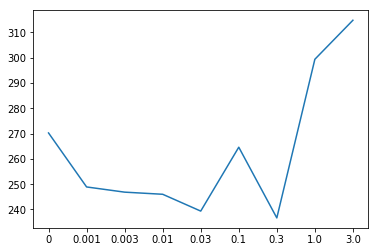

In [247]:
plt.plot(range(len(coefs)), nlls)
plt.xticks(range(len(coefs)), coefs);

### learned covariance

In [248]:
th_corex_cov = th_corex.get_covariance()

In [249]:
calculate_nll_score(data=[test_data], covs=[th_corex_cov])

236.66712998603157

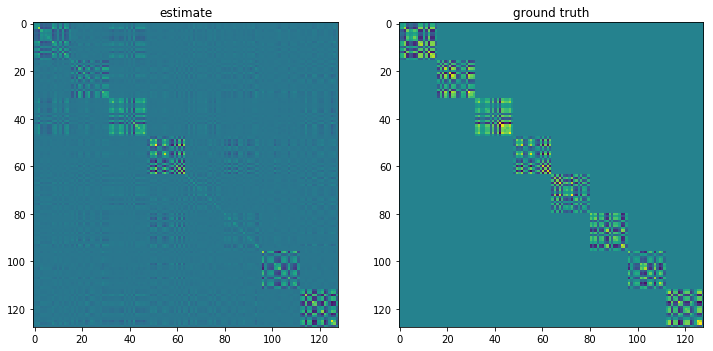

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(th_corex_cov)
ax[0].set_title('estimate')
ax[1].imshow(ground_truth)
ax[1].set_title('ground truth');

### W matrice

In [251]:
W = th_corex.ws.get_value()
print W.shape

(8, 128)


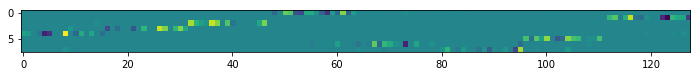

In [252]:
plt.figure(figsize=(12, 6))
plt.imshow(W);

### distibution of Z

In [253]:
Z = np.dot(data, W.T)
print Z.shape

(108, 8)


In [254]:
print np.var(Z, axis=0)

[ 326.075  293.456  207.992  174.119  114.705  159.777   77.18    59.365]


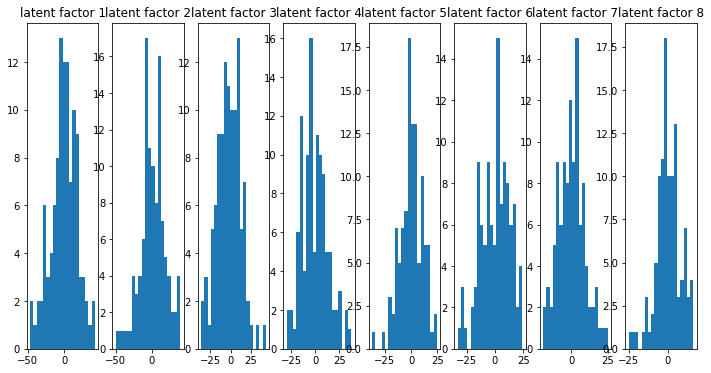

In [255]:
fig, ax = plt.subplots(nrows=1, ncols=m, figsize=(12, 6))
for i in range(m):
    ax[i].hist(Z[:, i], bins=20)
    ax[i].set_title('latent factor {}'.format(i+1))

# Summary of results